# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [2]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [23]:
# Import data.
air_quality=pd.read_csv('c4_epa_air_quality.csv')
air_quality=air_quality.dropna()

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [5]:
# First 10 rows of the data
print(air_quality.head(10))

    Unnamed: 0  date_local    state_name   county_name      city_name  \
0            0  2018-01-01       Arizona      Maricopa        Buckeye   
1            1  2018-01-01          Ohio       Belmont      Shadyside   
2            2  2018-01-01       Wyoming         Teton  Not in a city   
3            3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4            4  2018-01-01          Iowa          Polk     Des Moines   
5            5  2018-01-01        Hawaii      Honolulu  Not in a city   
6            6  2018-01-01        Hawaii      Honolulu  Not in a city   
8            8  2018-01-01        Hawaii      Honolulu       Honolulu   
9            9  2018-01-01      Colorado       Larimer   Fort Collins   
10          10  2018-01-01     Minnesota        Dakota      Rosemount   

                                      local_site_name   parameter_name  \
0                                             BUCKEYE  Carbon monoxide   
1                                           Shad

### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [26]:
# Code Here
air_quality = df["aqi"].describe()
print(air_quality)

count    257.000000
mean       6.782101
std        7.091422
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: 6.782

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A: 257

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [22]:
# Code Here
df = pd.read_csv("c4_epa_air_quality.csv") 
df = df.dropna()
population_mean = df["aqi"].mean()
print("Population Mean of AQI:", population_mean)

Population Mean of AQI: 6.782101167315175


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [38]:
# Code Here
c4_epa_air_quality = pd.read_csv("c4_epa_air_quality.csv")  # Replace with the actual filename

# Take a random sample of 50 rows with replacement
sampled_data = c4_epa_air_quality.sample(n=50, replace=True, random_state=42)

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [41]:
# Code Here

print(sampled_data.head(10))

     Unnamed: 0  date_local      state_name    county_name   city_name  \
102         102  2018-01-01           Texas         Harris     Houston   
106         106  2018-01-01      California       Imperial    Calexico   
71           71  2018-01-01         Alabama      Jefferson  Birmingham   
188         188  2018-01-01         Arizona       Maricopa       Tempe   
20           20  2018-01-01        Virginia        Roanoke      Vinton   
102         102  2018-01-01           Texas         Harris     Houston   
121         121  2018-01-01  North Carolina    Mecklenburg   Charlotte   
214         214  2018-01-01         Florida        Broward       Davie   
87           87  2018-01-01      California       Humboldt      Eureka   
99           99  2018-01-01      California  Santa Barbara      Goleta   

                   local_site_name   parameter_name   units_of_measure  \
102                        Clinton  Carbon monoxide  Parts per million   
106          Calexico-Ethel Street  C

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: Sampling with replacement means that after selecting a row, it is not removed from the dataset, so it can be selected again in another random draw

**Question:** What does `random_state` do?

A:The random_state parameter in sample() (or other random functions like train_test_split in scikit-learn) controls the randomness of the sampling to ensure reproducibility.

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [43]:
# Code Here
sample_mean = sampled_data["aqi"].mean()
print("Sample Mean of AQI:", sample_mean)

Sample Mean of AQI: 5.54


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: because they use different size data. 

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [44]:
# Code Here
estimate_list = []
for i in range(10000):
    estimate_list.append(c4_epa_air_quality['aqi'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [ ]:
# Code Here
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [45]:
# Code Here
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

6.756292

**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [ ]:
# Code Here
6,756

**Question:** How are the central limit theorem and random sampling (with replacement) related?

In [ ]:
# Code Here
The Central Limit Theorem (CLT) and random sampling with replacement are closely related because bootstrapping and other resampling methods rely on CLT to approximate the sampling distribution of the mean

A:

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

In [47]:
estimate1 = sampled_data['aqi'].mean()
estimate1

5.54

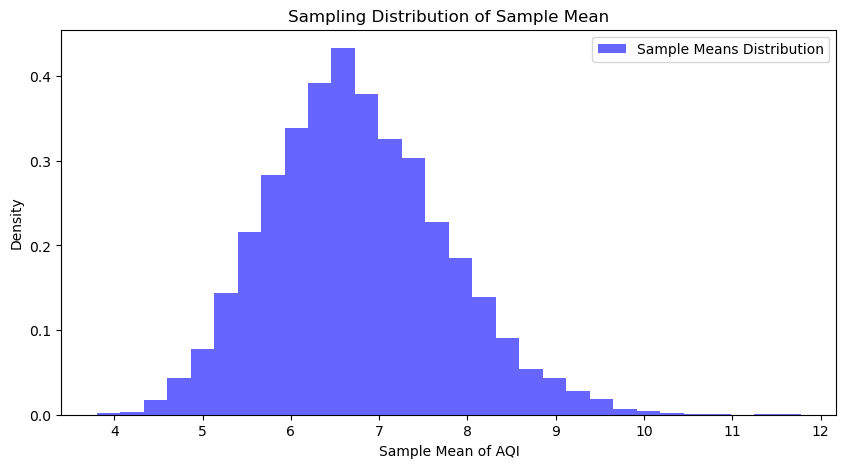

In [50]:
# Code Here
import matplotlib.pyplot as plt

# Generate histogram of the sampling distribution
plt.figure(figsize=(10,5))
plt.hist(estimate_df['estimate'], bins=30, density=True, alpha=0.6, color='b', label="Sample Means Distribution")

# Labels and title
plt.xlabel("Sample Mean of AQI")
plt.ylabel("Density")
plt.title("Sampling Distribution of Sample Mean")
plt.legend()

# Show the plot
plt.show()


### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [49]:
# Code Here
import numpy as np

# Take an initial random sample of 50 AQI values
initial_sample = c4_epa_air_quality['aqi'].sample(n=50, replace=True, random_state=42)

# Compute the standard deviation of the sample
sample_std = np.std(initial_sample, ddof=1)  # Using ddof=1 for sample standard deviation

# Compute the standard error of the mean (SEM)
standard_error = sample_std / np.sqrt(50)

# Display the result
print("Standard Error of the Mean AQI:", standard_error)



Standard Error of the Mean AQI: 0.7413225908290327


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

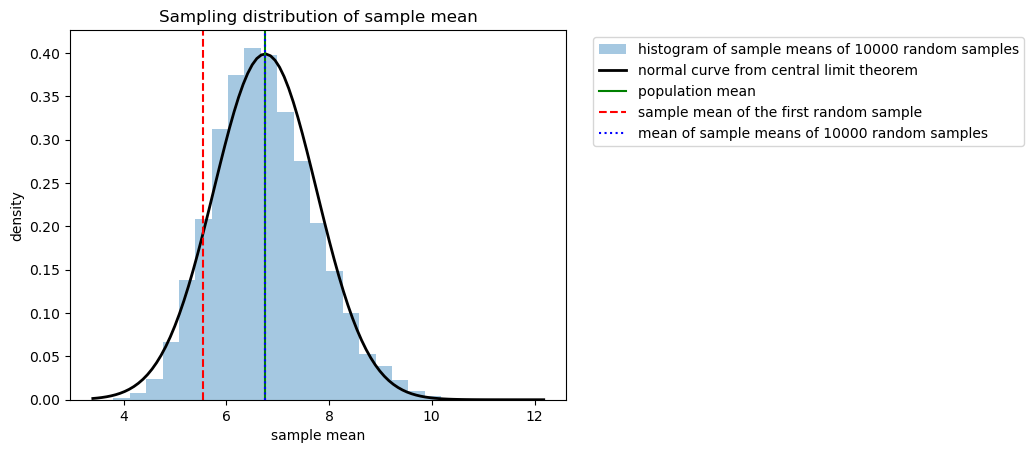

In [52]:
# Code Here
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()


**Question:** What insights did you gain from the preceding sampling distribution?

A:The sampling distribution of the mean is approximately normal (even if the original data isn't).
Sample means provide an accurate estimate of the population mean.
Individual samples may deviate, but taking multiple samples helps balance errors.
Smaller standard error means more precise estimates, reducing uncertainty.

# Considerations

**What are some key takeaways that you learned from this project?**

A:The Central Limit Theorem (CLT) ensures that the distribution of sample means is approximately normal, even when the original data is not.
Standard error is crucial for understanding how much a sample mean deviates from the true population mean.

**What findings would you share with others?**

A:
The shape of the sampling distribution is nearly normal, validating CLT in practice.

**What would you convey to external readers?**

A:This project demonstrates how statistical sampling methods can estimate real-world population parameters.